<font size="6">Expection Maximization</font>   
<font size="3">
1, radomly pick the distribution to have the $\mu, \Sigma, \pi (each cluster possibility)$  
2, (E step)get the each given data for each cluter $p(z=j|x_i)$ , using beyasian rule to $p(z=j|x_i) = \frac {p(z=j,x_i)}{p(x_i)}$  
3, (M step)update the $\mu, \Sigma, \pi $ using the calcuated $p(z=j|x_i)$ to weight each data  
4, repeat E-step
 </font>   

# Example 1

In [1]:
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
from scipy.stats import multivariate_normal     # for generating pdf

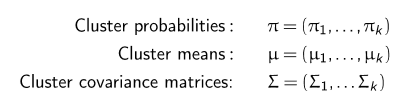


EM in GMM is to learn the parameters above. 
$$p(x,z) = p(z)p(x|z)
=\pi N(x|\mu_z,\Sigma_z) $$

* $\pi$ is probility of chooing cluster z
* $x|z$ has distribution $N(x|\mu_z,\Sigma_z)$
* $z$ corresponding to x is the true cluster assigement 

In [2]:
m1 = [1,1]      # consider a random mean and covariance value
m2 = [7,7]                                              
cov1 = [[3, 2], [2, 3]]                                      
cov2 = [[2, -1], [-1, 2]]
x = np.random.multivariate_normal(m1, cov1, size=(200,))  # Generating 200 samples for each mean and covariance
y = np.random.multivariate_normal(m2, cov2, size=(200,))
d = np.concatenate((x, y), axis=0)

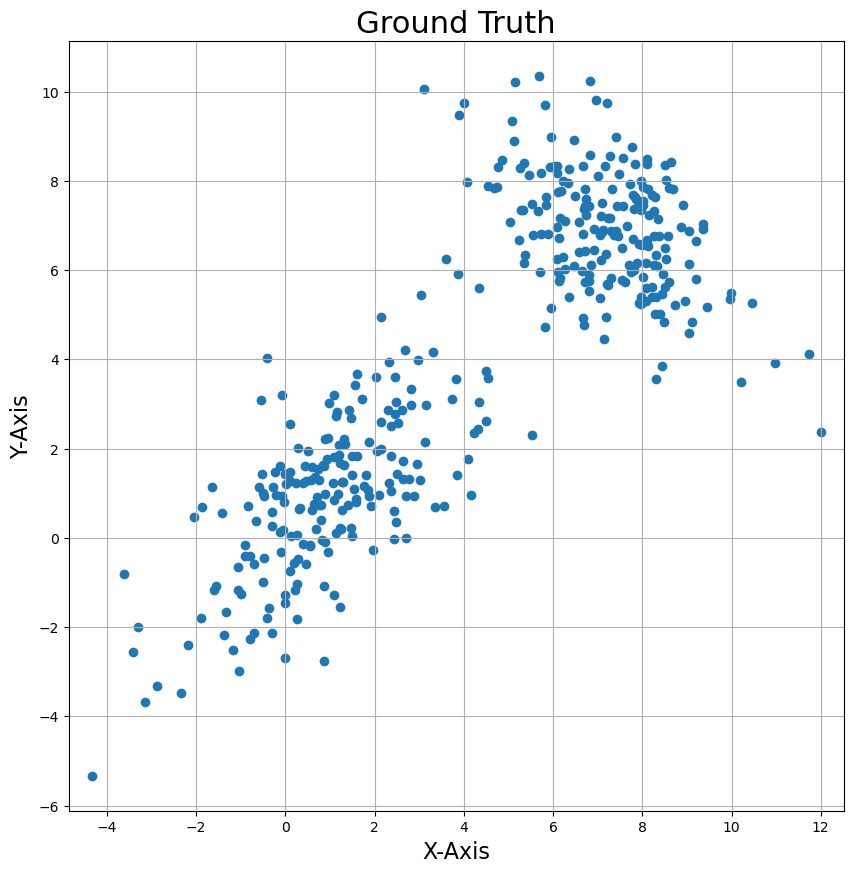

In [3]:
plt.figure(figsize=(10,10))                                 
plt.scatter(d[:,0], d[:,1], marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Ground Truth', fontsize=22)    
plt.grid()            
plt.show()

get the inital distribution from data
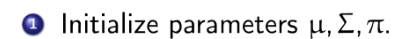

In [4]:
import random

m1 = random.choice(d)
m2 = random.choice(d)
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5

random sampling the  (m1,conv1) and (m2, conv2) distribution 

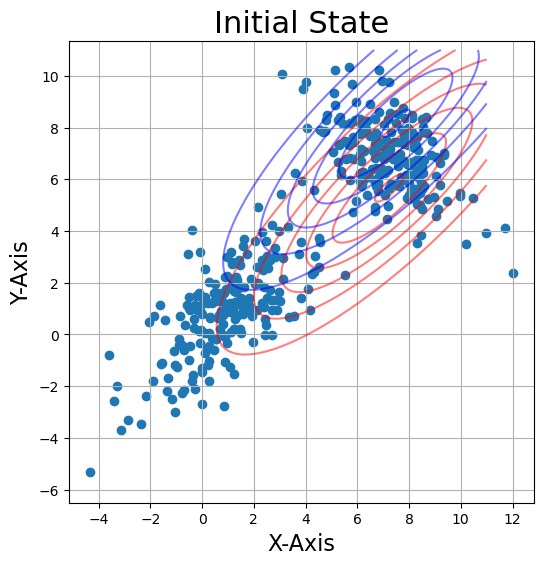

In [5]:
x1 = np.linspace(-4,11,200)  
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(6,6))                                                          # creating the figure and assigning the size
plt.scatter(d[:,0], d[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial State', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

<font size="4">
Denote the probability that observed $x_i$ comes from custler j by 

$$\gamma_i^j=p(z=j|x=x_i)$$

computationally 
$$\begin{aligned}
\gamma_i ^j&=p(z=j|x_i) \\
&= p(z=j,x_i)/p(x_i) \\
&= \frac{\pi_j N(x_i|\mu_z,\Sigma_z)}{\sum_{c=1}^k(\pi_c N(x_i|\mu_z,\Sigma_z))}
\end{aligned}$$

${\sum_{c=1}^k(\pi_c N(x_i|\mu_z,\Sigma_z))}$ indicate the sum of the all possibiltiy belonged to different cluster c from 1 to k , for example in 1-D , 2clusters it could be
    
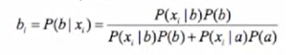

$\pi_c$ could cacluate as such 
$$\pi_c = \frac{n_c}{n} $$ let $n_c=\sum_{i=1}^n \gamma_i^c$ 
at the very begining, it could be manually assigned value (?)
</font>
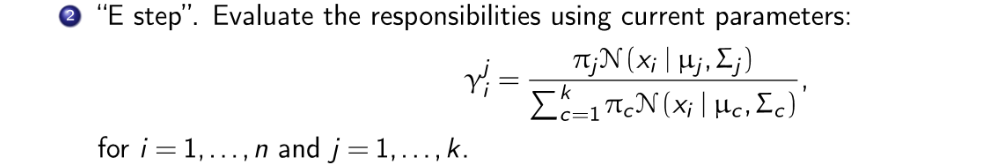

In [6]:
##Expectation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]
    
    #get the possibility for each given data under cluster 1 and 2
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2) 
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w2 = pi * pt2  ##the first cluster have the pi estimate priors
    w1 = (1-pi) * pt1  ##only two cluster, so another is 1-pi
    eval2 = w2/(w1+w2)

    return(eval2)

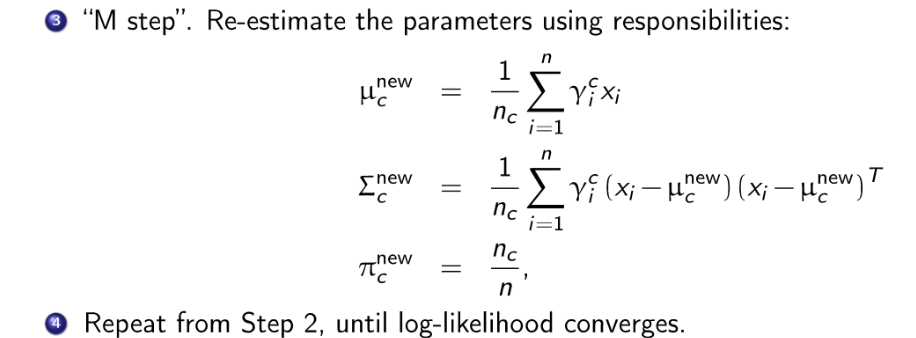

In [7]:
## Maximization step
def Mstep(eval1): #accutally it is the eval for the cluster 2 instead 1 
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1  # get the new mu1
    mu2 = num_mu2/din_mu2  # get the new mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)  # x-mu
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1) # p(c|x)*(x-mu)*(x-mu)_T
        din_s1 += (1-eval1[i])  #n_c

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1  #normalize with n_c
    s2 = num_s2/din_s2  #normalize with n_c

    pi = sum(eval1)/len(d)  # new priors 
    
    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [8]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)  
    Z2 = multivariate_normal(mu2, s2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(6,6))                                                          # creating the figure and assigning the size
    plt.scatter(d[:,0], d[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.grid()                                                                         # displaying gridlines
    plt.show()

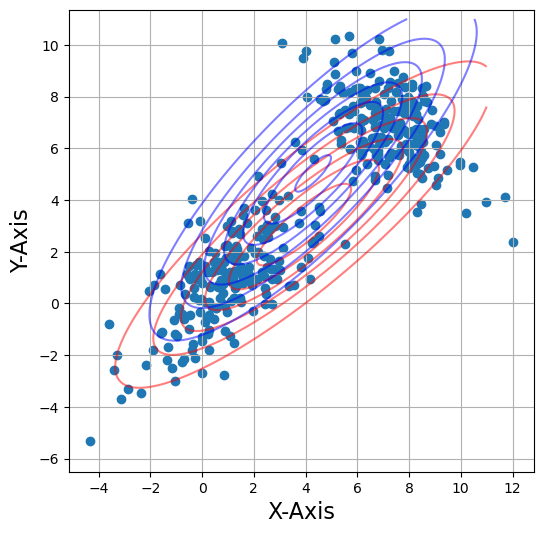

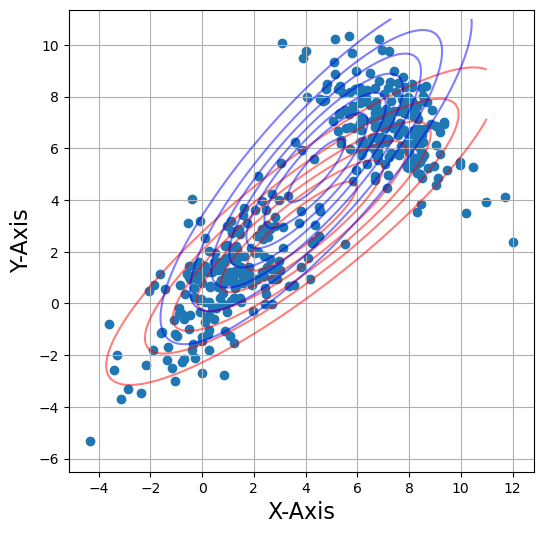

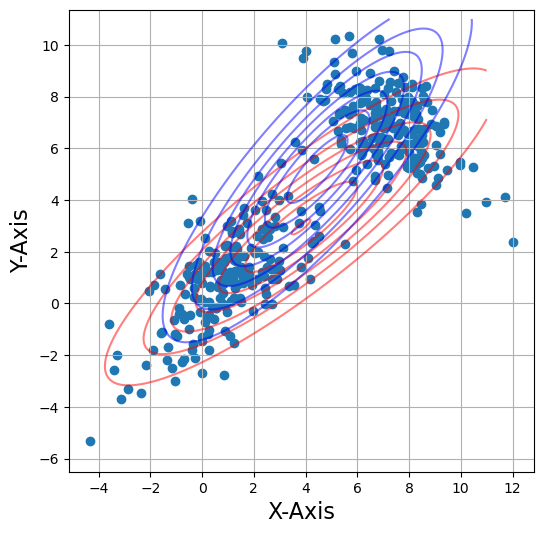

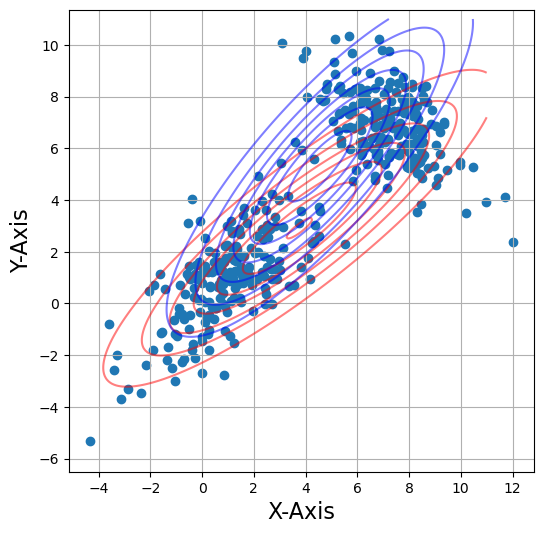

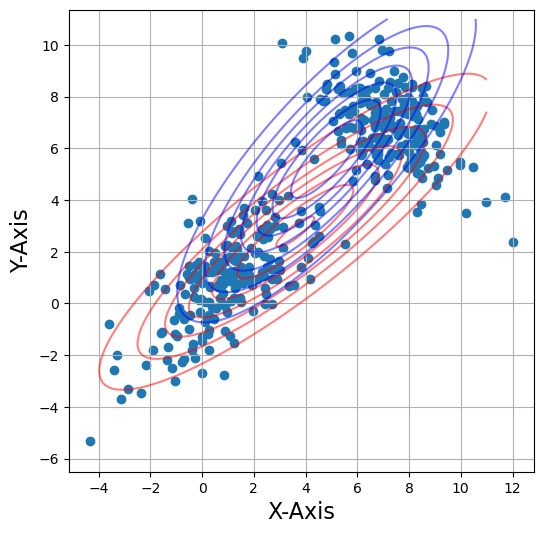

In [9]:
iterations = 20
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
        plot(lis1)

# Example 2

In [10]:
#import requred libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import warnings
import random

warnings.filterwarnings('ignore')

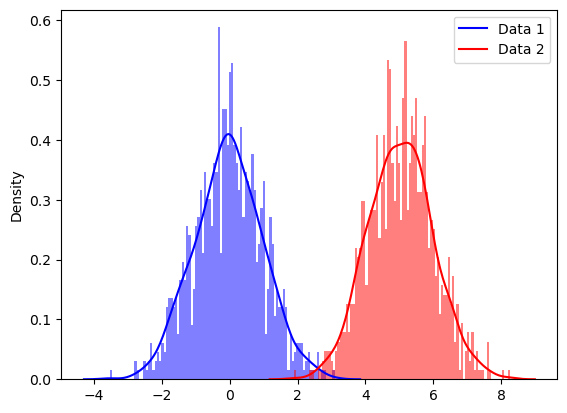

In [11]:
# Generate some data with multiple modes
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(5, 1, 1000)

# Plot the data using seaborn's distplot function
sns.distplot(data1, kde=True, hist=True, bins=100, color='b', hist_kws={'alpha': 0.5})
sns.distplot(data2, kde=True, hist=True, bins=100, color='r', hist_kws={'alpha': 0.5})

# Add a legend
plt.legend(['Data 1', 'Data 2'])

# Show the plot
plt.show()

In [12]:
# Set the mean and covariance 
mean1 = [0, 0] 
mean2 = [2, 0] 
cov1 = [[1, .7], [.7, 1]] 
cov2 = [[.5, .4], [.4, .5]] 

# Generate data from the mean and covariance 
data1 = np.random.multivariate_normal(mean1, cov1, size=1000) 
data2 = np.random.multivariate_normal(mean2, cov2, size=1000)

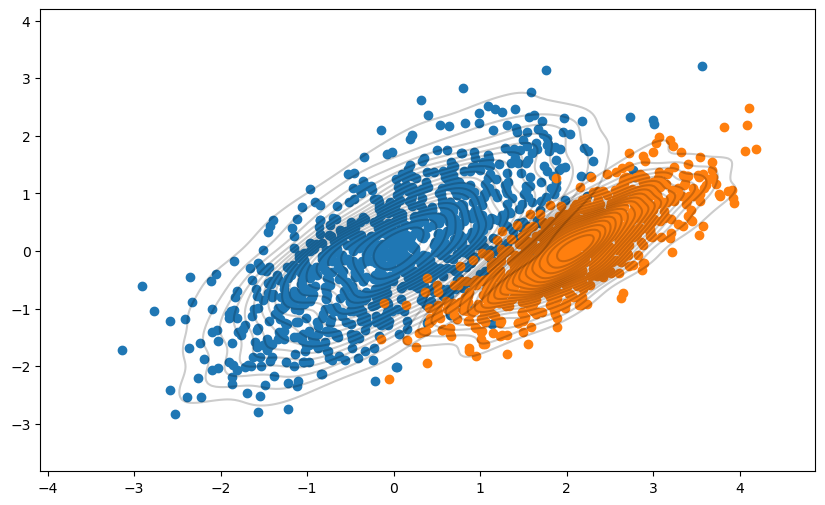

In [13]:
plt.figure(figsize=(10,6)) 

plt.scatter(data1[:,0],data1[:,1]) 
plt.scatter(data2[:,0],data2[:,1]) 

sns.kdeplot(x=data1[:, 0], y=data1[:, 1], levels=20, linewidth=10, color='k', alpha=0.2) 
sns.kdeplot(x=data2[:, 0], y=data2[:, 1], levels=20, linewidth=10, color='k', alpha=0.2) 

plt.grid(False) 
plt.show()

In [14]:
import numpy as np 
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework

n_samples = 100 
mu1, sigma1 = -5, 1.2  
mu2, sigma2 = 5, 1.8  
mu3, sigma3 = 0, 1.6  

x1 = np.random.normal(loc = mu1, scale = np.sqrt(sigma1), size = n_samples) 
x2 = np.random.normal(loc = mu2, scale = np.sqrt(sigma2), size = n_samples) 
x3 = np.random.normal(loc = mu3, scale = np.sqrt(sigma3), size = n_samples) 

X = np.concatenate((x1,x2,x3))
#下面是可视化的函数封装
from scipy.stats import norm 

def plot_pdf(mu,sigma,label,alpha=0.5,linestyle='k--',density=True,color='green'):
    """
    Plot 1-D data and its PDF curve.

    Parameters
    ----------
    X : array-like, shape (n_samples,)
        The input data.
    """
    # Compute the mean and standard deviation of the data

    # Plot the data
    
    X = norm.rvs(mu, sigma, size=1000)
    
    plt.hist(X, bins=50, density=density, alpha=alpha,label=label,color=color)

    # Plot the PDF
    x = np.linspace(X.min(), X.max(), 1000)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, linestyle)

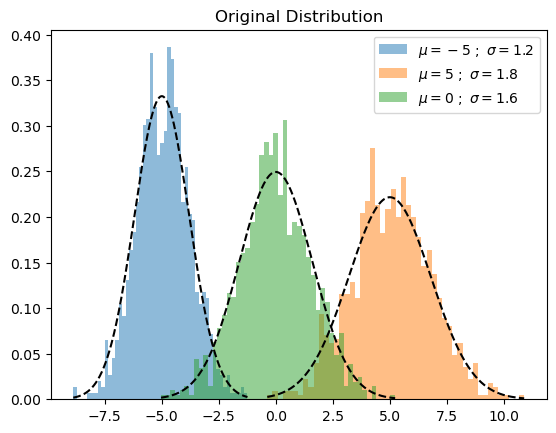

In [15]:
plot_pdf(mu1,sigma1,label=r"$\mu={} \ ; \ \sigma={}$".format(mu1,sigma1),color=None)
plot_pdf(mu2,sigma2,label=r"$\mu={} \ ; \ \sigma={}$".format(mu2,sigma2),color=None)
plot_pdf(mu3,sigma3,label=r"$\mu={} \ ; \ \sigma={}$".format(mu3,sigma3),color=None)
plt.title("Original Distribution")
plt.legend()
plt.show()

In [16]:
def random_init(n_compenents): 
    """Initialize means, weights and variance randomly  
      and plot the initialization 
    """ 
 
    pi = np.ones((n_compenents)) / n_compenents 
    means = np.random.choice(X, n_compenents) 
    variances = np.random.random_sample(size=n_compenents) 

    plot_pdf(means[0],variances[0],'Random Init 01') 
    plot_pdf(means[1],variances[1],'Random Init 02') 
    plot_pdf(means[2],variances[2],'Random Init 03') 
 
    plt.legend() 
    plt.show() 
    return means,variances,pi

In [17]:
def step_expectation(X,n_components,means,variances): 
    """E Step 
 
    Parameters 
    ---------- 
    X : array-like, shape (n_samples,) 
        The data. 
    n_components : int 
        The number of clusters 
    means : array-like, shape (n_components,) 
        The means of each mixture component. 
    variances : array-like, shape (n_components,) 
        The variances of each mixture component. 
 
    Returns 
    ------- 
    weights : array-like, shape (n_components,n_samples) 
    """ 
    weights = np.zeros((n_components,len(X))) 
    for j in range(n_components): 
        weights[j,:] = norm(loc=means[j],scale=np.sqrt(variances[j])).pdf(X) 
 
    return weights

In [18]:
def step_maximization(X,weights,means,variances,n_compenents,pi): 

    """M Step 
 
    Parameters 
    ---------- 
    X : array-like, shape (n_samples,) 
        The data. 
    weights : array-like, shape (n_components,n_samples) 
        initilized weights array 
    means : array-like, shape (n_components,) 
        The means of each mixture component. 
    variances : array-like, shape (n_components,) 
        The variances of each mixture component. 
    n_components : int 
        The number of clusters 
    pi: array-like (n_components,) 
        mixture component weights 
 
    Returns 
    ------- 
    means : array-like, shape (n_components,) 
        The means of each mixture component. 
    variances : array-like, shape (n_components,) 
        The variances of each mixture component. 
    """ 
    r = []
    for j in range(n_compenents):   
        r.append((weights[j] * pi[j]) / (np.sum([weights[i] * pi[i] for i in range(n_compenents)], axis=0))) 
        #5th equation above 
        means[j] = np.sum(r[j] * X) / (np.sum(r[j])) 
        #6th equation above 
        variances[j] = np.sum(r[j] * np.square(X - means[j])) / (np.sum(r[j])) 
        #4th equation above 
        pi[j] = np.mean(r[j]) 
    return variances,means,pi

In [19]:
def train_gmm(data,n_compenents=3,n_steps=50, plot_intermediate_steps_flag=True):
    """ Training step of the GMM model
    
    Parameters
    ----------
    data : array-like, shape (n_samples,)
        The data.
    n_components : int
        The number of clusters
    n_steps: int
        number of iterations to run
    """
    
    
    means,variances,pi = random_init(n_compenents)
    for step in range(n_steps):
        weights = step_expectation(data,n_compenents,means,variances)
        variances,means,pi = step_maximization(X, weights, means, variances, n_compenents, pi)
        if plot_intermediate_steps_flag:plot_intermediate_steps(means,variances,)#file_name=f'step_{step+1}')
    plot_intermediate_steps(means,variances)

In [20]:
def plot_intermediate_steps(means,variances,density=False,save=False,file_name=None):
    
    plot_pdf(mu1,sigma1,alpha=0.0,linestyle='r--',label='Original Distibutions')
    plot_pdf(mu2,sigma2,alpha=0.0,linestyle='r--',label='Original Distibutions')
    plot_pdf(mu3,sigma3,alpha=0.0,linestyle='r--',label='Original Distibutions')
    
    color_gen = (x for x in ['green','blue','orange'])
    
    for mu,sigma in zip(means,variances):
        plot_pdf(mu,sigma,alpha=0.5,label='d',color=next(color_gen))
    if save or file_name is not None:
        step = file_name.split("_")[1]
        plt.title(f"step: {step}")
        plt.savefig(f"steps/{file_name}.png",bbox_inches='tight')
    plt.show()

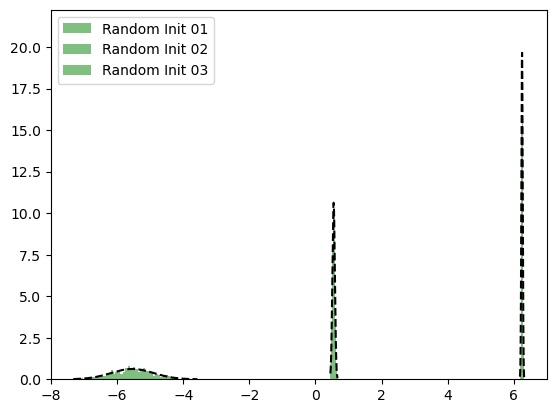

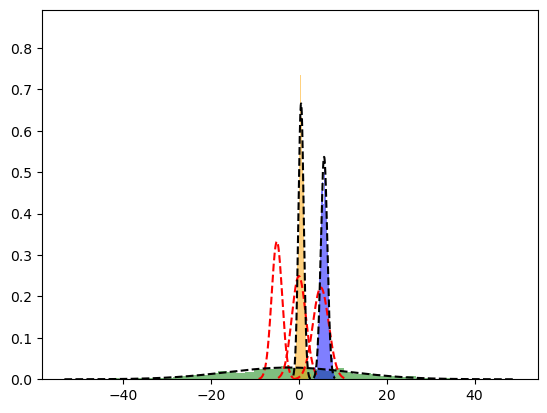

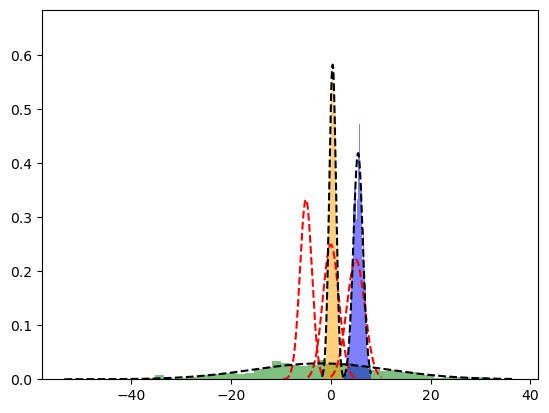

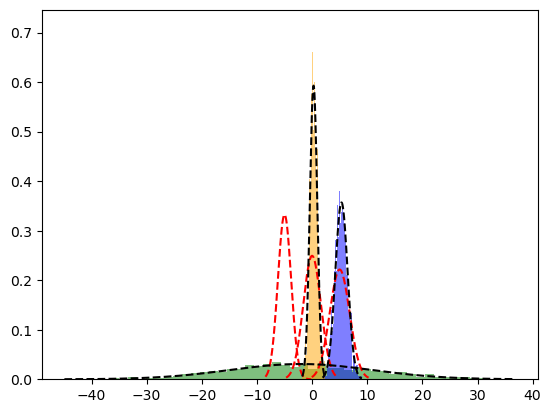

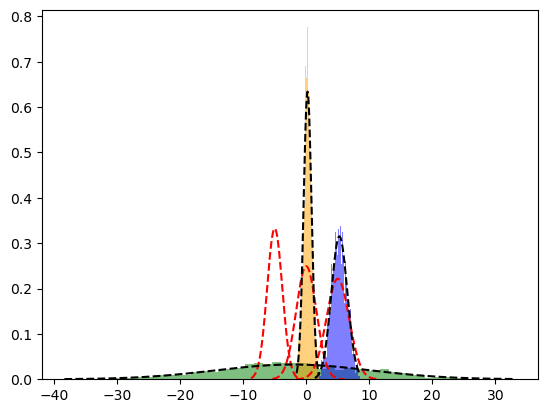

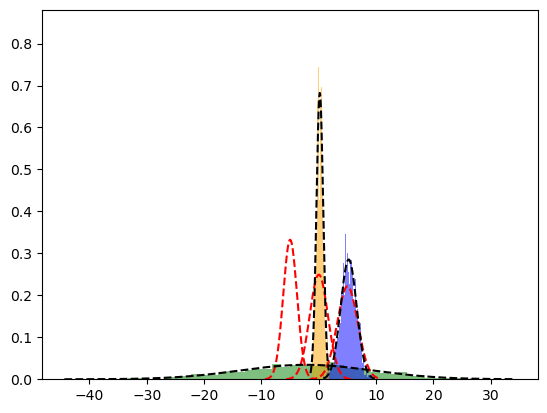

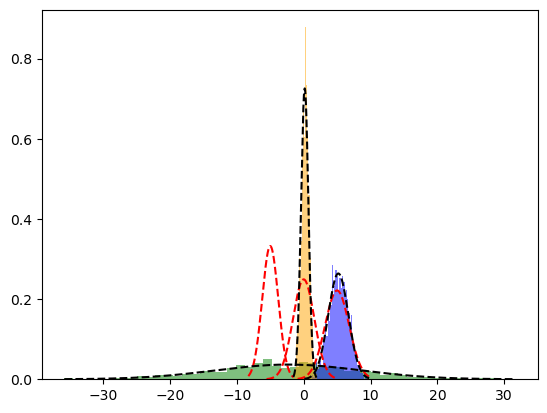

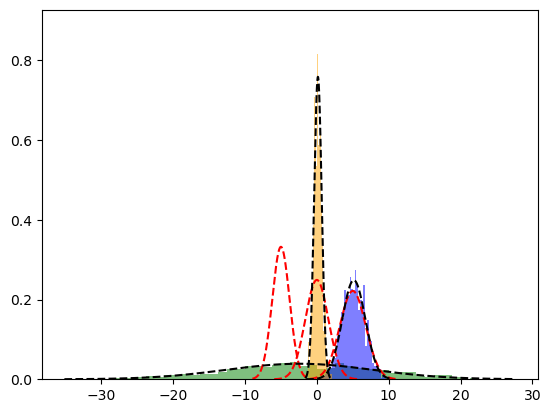

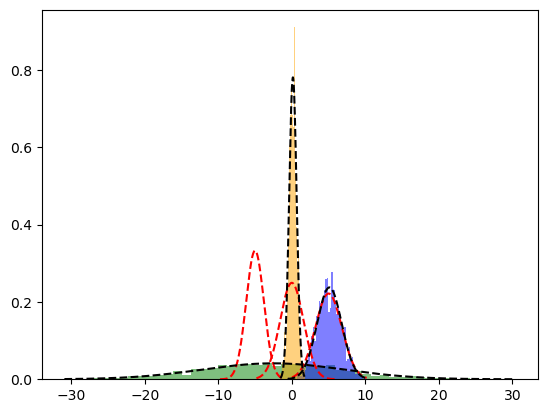

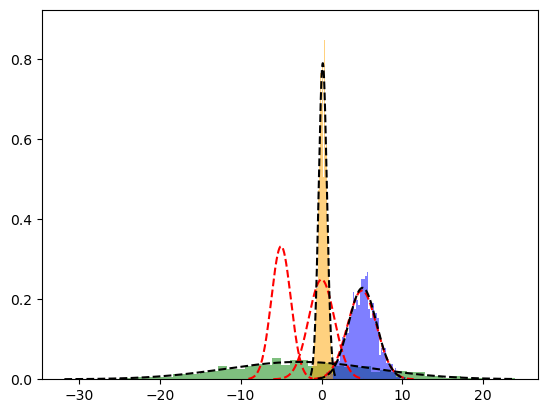

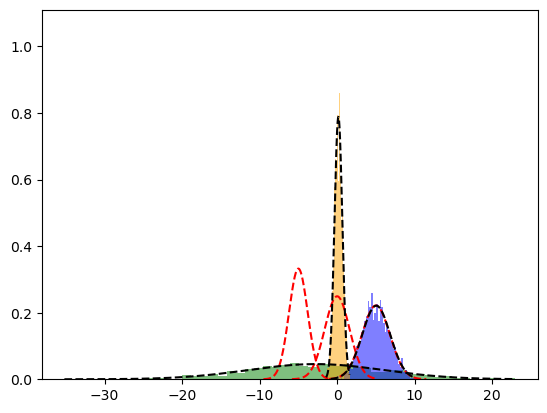

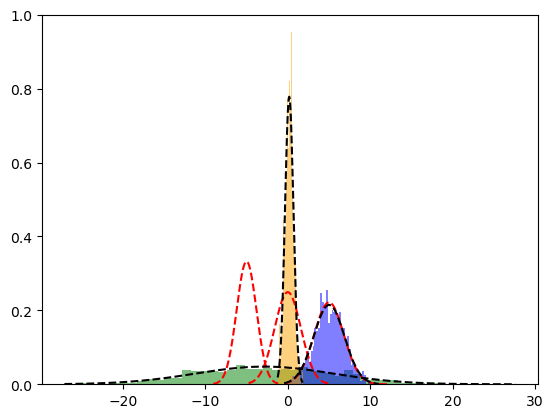

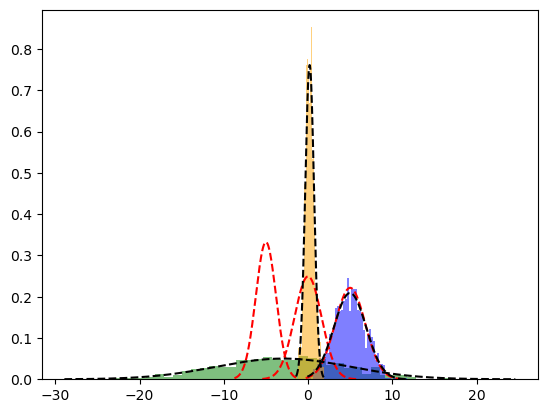

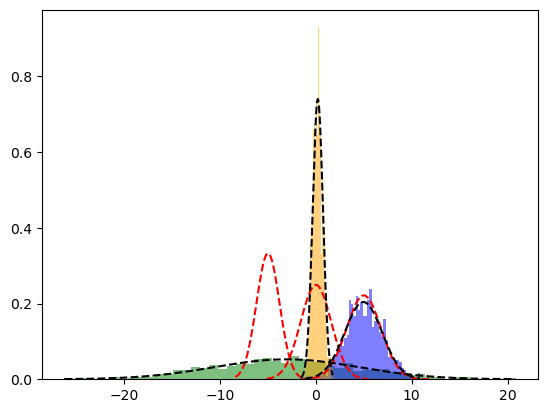

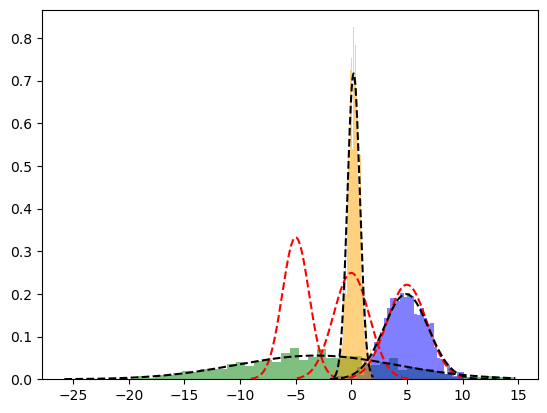

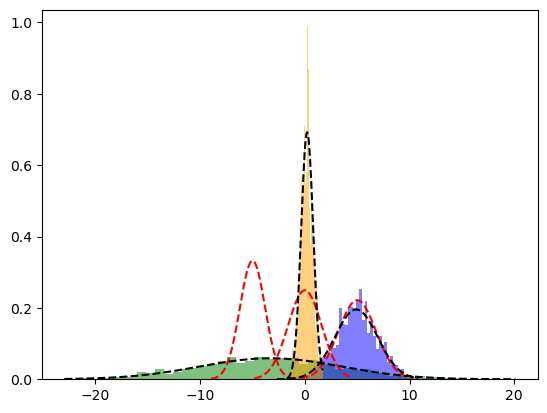

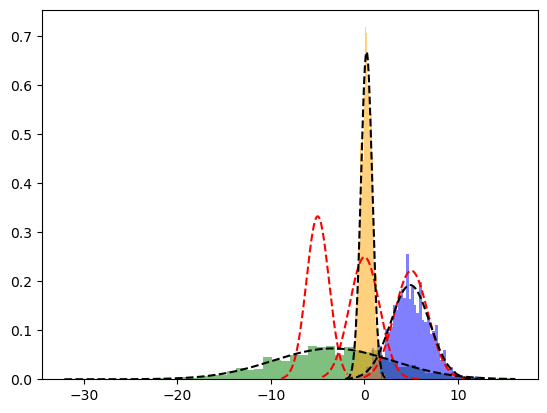

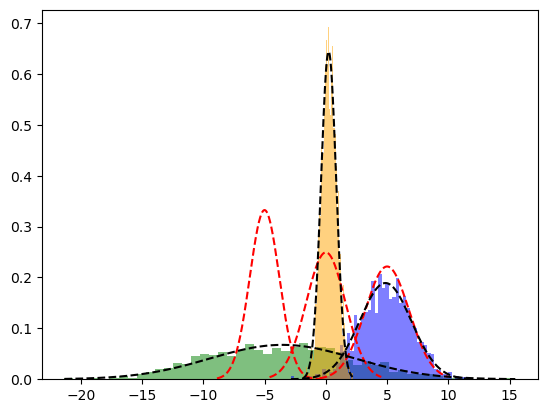

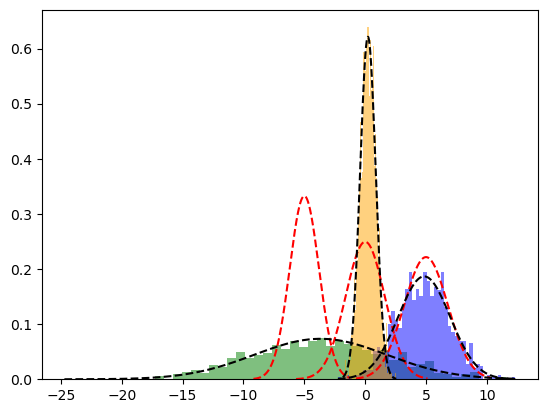

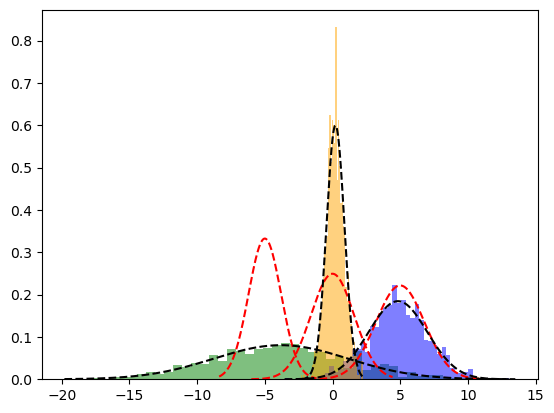

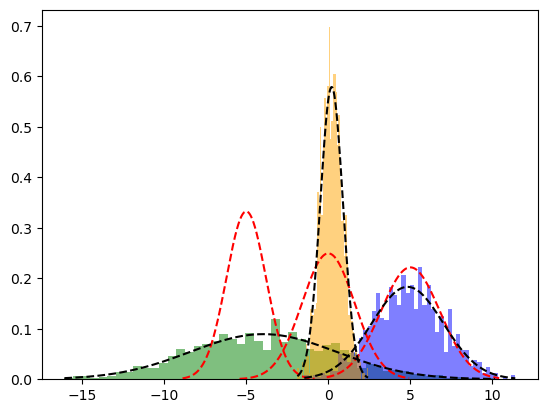

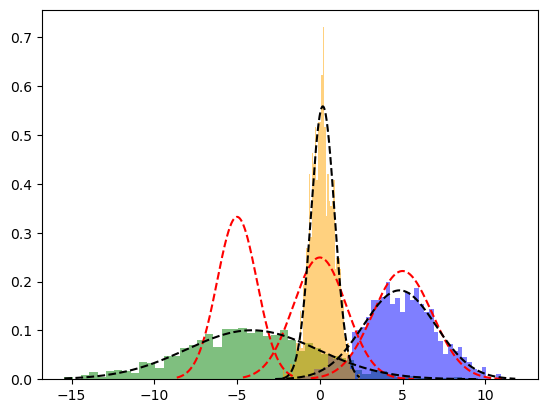

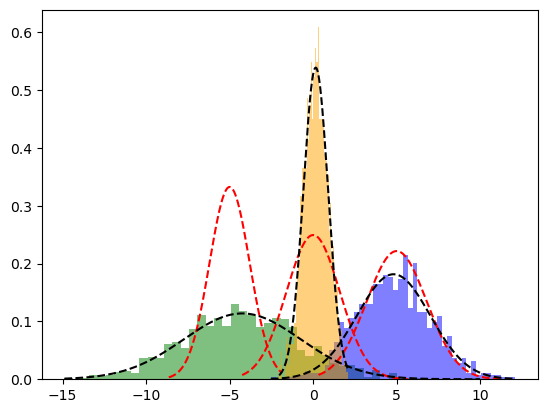

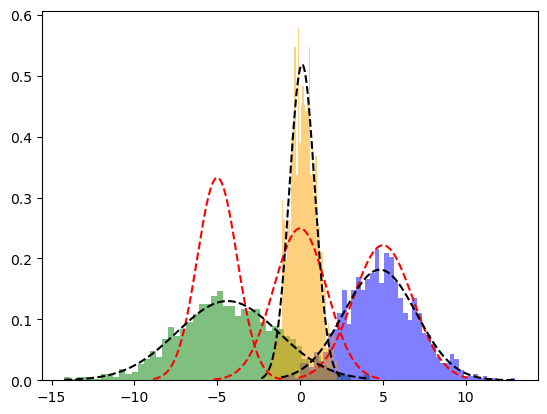

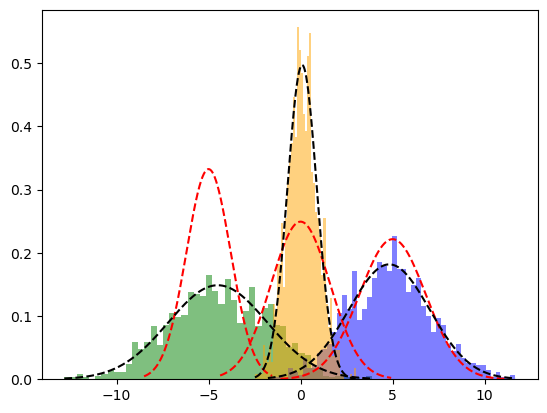

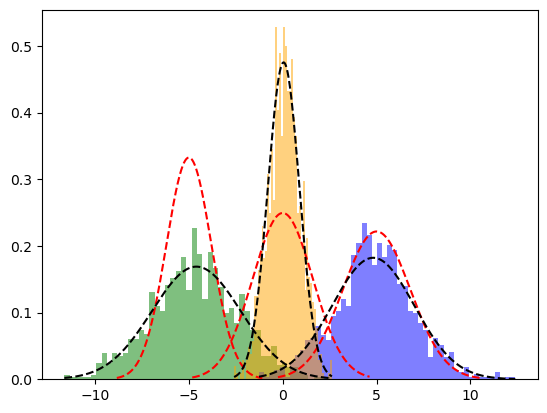

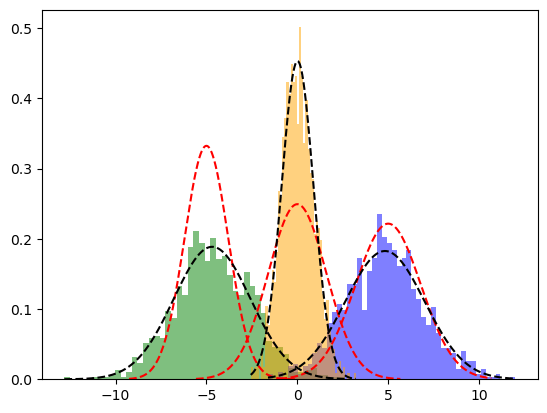

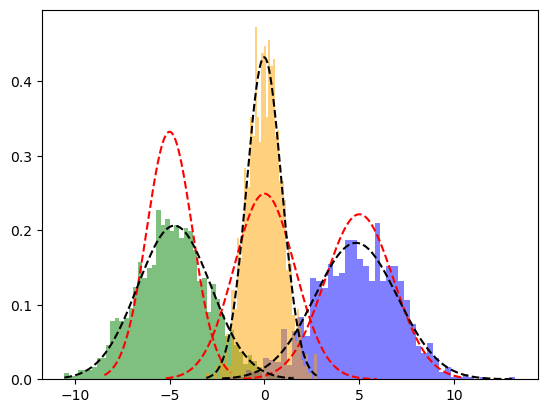

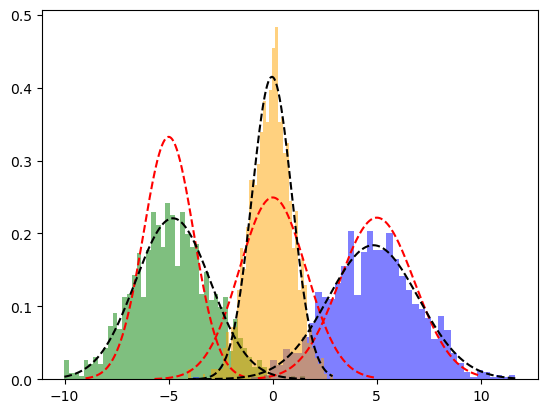

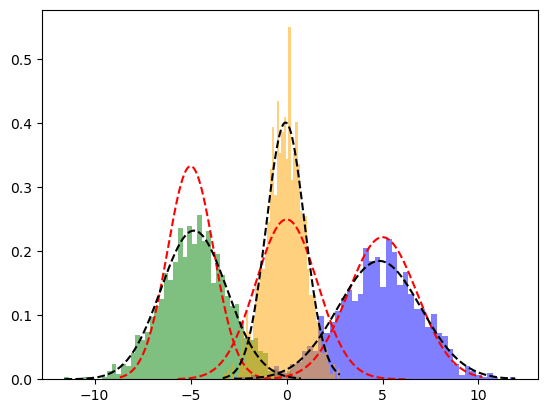

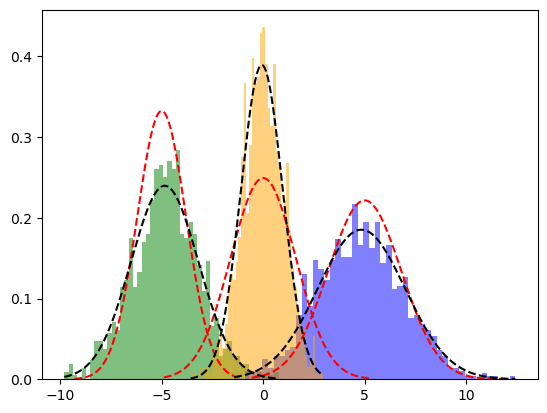

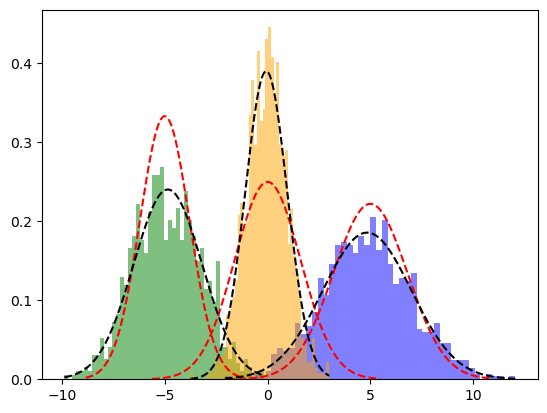

In [21]:
train_gmm(X,n_steps=30,plot_intermediate_steps_flag=True)